# Initializing the aircraft object (simulated)

Calibrating motors to find power at equilibrium
Critial Power at: 50.2%
Using simulation critical power at:50.0%


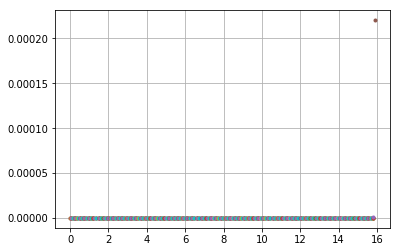

In [1]:
import os, sys
import time
%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('C:\\Users\\Sean\\repos\\')
sys.path.append('C:\\Users\\Sean\\repos\\Python-Arduino-Proto-API-v2')

from aircraft import aircraft

simulation = 1
a_com = 'COM3'
motors = [9, 10, 11, 12]
ultrasonic_sensor = [2, 3]

ac = aircraft(a_com, motors, ultrasonic_sensor, simulation=simulation)

# Testing flight controller movements

In [2]:
# Testing acceleration
ac.set_motors(ac.crit_speed + 10)
for i in range(10):
    print(ac.check_altitude())
    time.sleep(0.5)

0.0193795
0.141316
0.4628785
0.9754919999999999
1.6921905
2.6069714999999998
3.7210354999999997
5.041414
6.542724999999999
8.240575


In [3]:
# Testing drag at equilibrium
print('Setting motors to equilibrium')
ac.set_motors(ac.crit_speed)
for i in range(20):
    print(ac.check_altitude())
    time.sleep(0.5)

Setting motors to equilibrium
10.2671905
12.023522
13.3905485
14.4545345
15.282708
15.927204999999999
16.4377605
16.826207999999998
17.128562499999997
17.363860499999998
17.547022499999997
17.689539
17.8004995
17.8869355
17.9541635
18.006470999999998
18.0478025
18.0793585
18.104397499999997
18.123434


In [4]:
# Testing deceleration
print('Starting free fall')
ac.set_motors(0)
for i in range(15):
    print(ac.check_altitude())
    time.sleep(0.25)

Starting free fall
18.136811
17.761912
16.760351999999997
15.114638000000001
12.7981875
9.873598
6.3175455000000005
1.9369210000000001
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [5]:
# Testing set_altitude command
ac.set_altitude(20)
for i in range(10):
    print(ac.check_altitude())
    time.sleep(0.25)

Current Altitude is: 20.0299995
20.108375
20.845653499999997
21.496152999999996
22.091600999999997
22.6141615
23.072923999999997
23.4610285
23.803514
24.1055255
24.382154999999997


# Plotting log of simulated aircraft state

Text(0.5, 0, 'Time (s)')

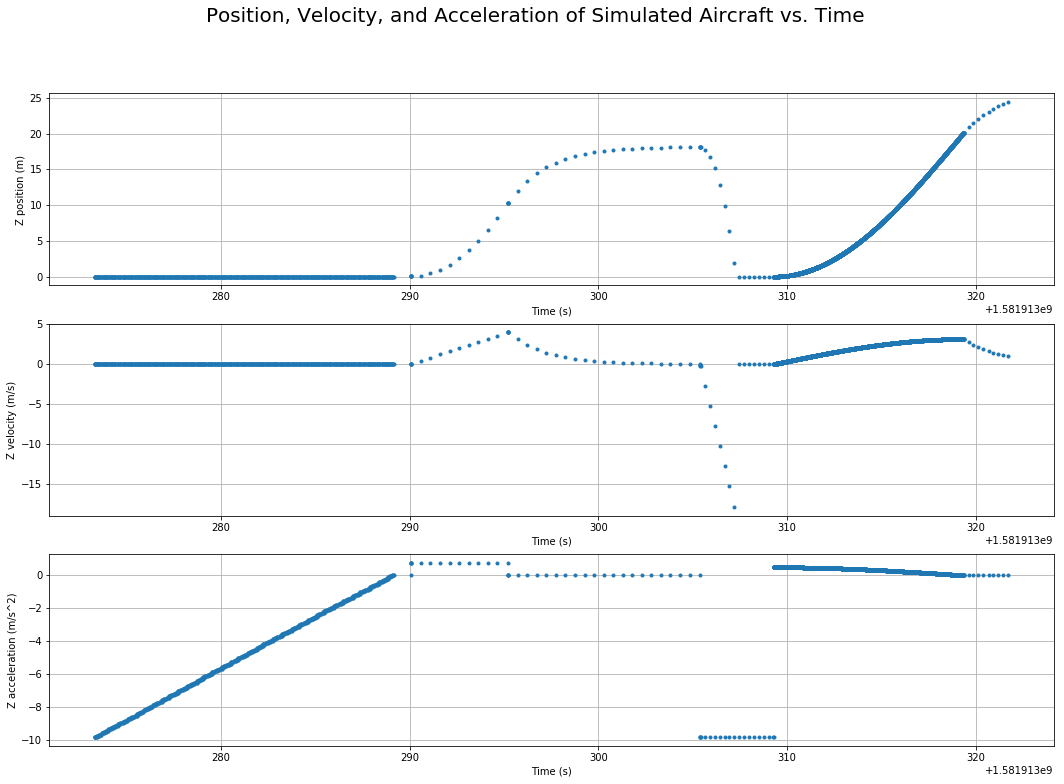

In [6]:
fig = plt.figure(figsize=(18,12))
fig.suptitle('Position, Velocity, and Acceleration of Simulated Aircraft vs. Time', fontsize=20)
ax1 = fig.add_subplot(311)
ax1.plot(ac.arduino.t_log, ac.arduino.z_pos_log, '.')
ax1.grid()
ax1.set_ylabel('Z position (m)')
ax1.set_xlabel('Time (s)')
ax2 = fig.add_subplot(312)
ax2.plot(ac.arduino.t_log, ac.arduino.z_vel_log, '.')
ax2.grid()
ax2.set_ylabel('Z velocity (m/s)')
ax2.set_xlabel('Time (s)')
ax3 = fig.add_subplot(313)
ax3.plot(ac.arduino.t_log, ac.arduino.z_acc_log, '.')
ax3.grid()
ax3.set_ylabel('Z acceleration (m/s^2)')
ax3.set_xlabel('Time (s)')